### Scientific Question
 
How does geochemistry and inferred volatile content evolve over the emplacement of the Columbia River Basalt Group?

### Hypothesis

The Columbia River Basalt Group consists of 350 lava flows that are divided into 5 major formations: Steens, Imnaha, Grande Ronde, Wanapum, and Saddle Moutain. The earlier emplaced Steens formation consist of more primitive magmas, therefore I predict the Steens may have a greater volatile content than the later formations.

### Dataset

[Compilation of geochemistry data from the Columbia River Plateau-Blue Mountains Province](https://drive.google.com/file/d/14ayP9bT4SRdWnwocO50IcPw0J963tqWR/view?usp=sharing)

File downloaded from the GEOROC - Geochemical database (http://georoc.mpch-mainz.gwdg.de/georoc/). 
<br/> Date of Query: November 13, 2020
<br/> Query Criteria: Query by Geologic Setting -> Continental Flood Basalts -> Yellowstone-Snake River Plain Volcanic Province -> Columbia Plateau-Blue Mountains Province -> No Further Constraint -> Sample Criteria (combined with OR) -> Type of Material: Volcanic Glass, Inclusion, Mineral, Wholerock 

### Analysis

First, I will load the .csv file of published geochemical data for the Columbia River Basalt Group; I will clean up the data file for any missing values or duplicate reporting and normalize the major element data to 100%. 

<b>Step 1:</b> Import pandas, numpy, matplotlib, IPython figure display settings, cartopy. Install Pyrolite.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('retina')
%matplotlib inline
import cartopy
import cartopy.crs as ccrs

In [2]:
# pip install pyrolite

Note: you may need to restart the kernel to use updated packages.


<b>Step 2:</b> Load the .csv file of published geochemical data for the Columbia River Basalt Group using pandas. Skip bottom 3 rows containing citation and query information.

In [3]:
df = pd.read_csv('GEOROC_Compilation_ColumbiaRiverPlateau_11_13_20.csv', skipfooter=3)
df.tail()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Year,CITATION,SAMPLE NAME,UNIQUE_ID,LOCATION,ELEVATION (MIN.),ELEVATION (MAX.),SAMPLING TECHNIQUE,DRILLING DEPTH (MIN.),DRILLING DEPTH (MAX.),...,ENSTATITE(MOL%),FAYALITE(MOL%),FORSTERITE(MOL%),FERROSILITE(MOL%),ORTHOCLASE(MOL%),TEPHROITE(MOL%),ULVOSPINEL(MOL%),WOLLASTONITE(MOL%),AGE(MA),AGE_PB206_U238(MA)
9306,"[20746] MAHOOD G. A., BENSON T. R.: USING 40...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9307,"[22286] GREANEY A. T., RUDNICK R. L., GASCHNIG...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9308,"[22509] MOORE N. E., GRUNDER A. L., BOHRSON W....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9309,"[22917] STEFANO C. J., MUKASA S. B., CABATO J....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9310,"[23734] CAHOON E. B., STRECK M. J., KOPPERS A....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9311 entries, 0 to 9310
Data columns (total 160 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Year                         object 
 1   CITATION                     object 
 2   SAMPLE NAME                  object 
 3   UNIQUE_ID                    object 
 4   LOCATION                     object 
 5   ELEVATION (MIN.)             float64
 6   ELEVATION (MAX.)             float64
 7   SAMPLING TECHNIQUE           object 
 8   DRILLING DEPTH (MIN.)        float64
 9   DRILLING DEPTH (MAX.)        float64
 10  LAND/SEA (SAMPLING)          object 
 11  ROCK TYPE                    object 
 12  ROCK NAME                    object 
 13  ROCK TEXTURE                 object 
 14  SAMPLE COMMENT               object 
 15  AGE (MIN.)                   float64
 16  AGE (MAX.)                   float64
 17  GEOLOGICAL AGE               object 
 18  GEOLOGICAL AGE PREFIX        object 
 19  ERUPT

<b>Step 3:</b> Extract the stratigraphic information from the "LOCATION" column using Pandas text data functions. Add the information as new columns "MEMBER" and "FORMATION"

In [5]:
df['MEMBER'] = df.LOCATION.str.split('/').str[-1]
df['FORMATION'] = df.MEMBER.str.split('-').str[0]

# FORMATION column has two different keys for the same formation, " WANAPUM BASALT FORMATION" and " WANAPUM BASALT". 
# Use df.replace to rename duplicate.

df = df.replace(to_replace=' WANAPUM BASALT FORMATION',value=' WANAPUM BASALT')
list(df.FORMATION.unique())

[' YAKIMA BASALT',
 ' PICTURE GORGE BASALT',
 ' STEENS BASALT',
 ' BEAR CREEK BASALT',
 ' IMNAHA BASALT',
 ' SADDLE MOUNTAINS BASALT',
 ' WANAPUM BASALT',
 ' GRANDE RONDE BASALT',
 ' COLUMBIA PLATEAU',
 ' WEST BUTTE SHIELD COMPLEX',
 ' SLIDE CREEK BASALT',
 ' POWDER RIVER BASALT',
 ' WEISER BASALT',
 ' STRAWBERRY MOUNTAIN FORMATION',
 ' CLARNO FORMATION',
 ' MALHEUR GORGE BASALT ',
 ' HOG CREEK SEQUENCE ',
 ' WILDCAT CREEK ASH',
 ' KEENEY SEQUENCE ',
 ' JORDAN RANCH TYPE SEQUENCE',
 ' DEVINE CANYON ASH',
 ' SOURDOUGH SEQUENCE ',
 ' KIVETT SEQUENCE',
 ' HIGH LAVA PLAINS VOLCANIC FIELD',
 'MALHEUR GORGE BASALT',
 ' VENATOR RANCH BASALT',
 ' HUNTER CREEK BASALT',
 ' VISHER CREEK RHYOLITE',
 ' SWAMP CREEK RHYOLITE',
 ' MCEWEN CREEK VITROPHYRE',
 ' DINNER CREEK TUFF',
 ' KOOL SPRING FORMATION',
 ' CIRCLE BAR RHYOLITE',
 ' SOUTH FORK DACITE',
 ' BLACK BUTTE RHYOLITE',
 ' PUEBLO MOUNTAINS BASALT',
 ' HAWKS VALLEY ',
 ' MONUMENT DIKE SWARM',
 ' CHIEF JOSEPH DIKE SWARM',
 ' JARBIDGE RHYOLITE',


<b>Step 4:</b> Normalize major element raw data to 100%. Add new columns for the normalized data.

In [6]:
# Define Major Elements and create a new Column with the Major Element Total WT% for the Raw Data.
MAJOR_ELEMENTS_RAW = ['SIO2(WT%)','TIO2(WT%)','AL2O3(WT%)','MGO(WT%)','CAO(WT%)','K2O(WT%)',
                      'NA2O(WT%)','P2O5(WT%)','MNO(WT%)','FE2O3T(WT%)','FE2O3(WT%)','FEOT(WT%)',
                      'FEO(WT%)']
df['Total(WT%)RAW'] = df.loc[:,MAJOR_ELEMENTS_RAW].sum(axis=1, min_count=1)

# # Normalize major element data to 100%. Create a new Column for each normalized element.
df['SIO2(WT%)NORM'] = (df['SIO2(WT%)']/df['Total(WT%)RAW'])*100
df['TIO2(WT%)NORM'] = (df['TIO2(WT%)']/df['Total(WT%)RAW'])*100
df['AL2O3(WT%)NORM'] = (df['AL2O3(WT%)']/df['Total(WT%)RAW'])*100
df['MGO(WT%)NORM'] = (df['MGO(WT%)']/df['Total(WT%)RAW'])*100
df['CAO(WT%)NORM'] = (df['CAO(WT%)']/df['Total(WT%)RAW'])*100
df['K2O(WT%)NORM'] = (df['K2O(WT%)']/df['Total(WT%)RAW'])*100
df['NA2O(WT%)NORM'] = (df['NA2O(WT%)']/df['Total(WT%)RAW'])*100
df['P2O5(WT%)NORM'] = (df['P2O5(WT%)']/df['Total(WT%)RAW'])*100
df['MNO(WT%)NORM'] = (df['MNO(WT%)']/df['Total(WT%)RAW'])*100
df['FE2O3T(WT%)NORM'] = (df['FE2O3T(WT%)']/df['Total(WT%)RAW'])*100
df['FE2O3(WT%)NORM'] = (df['FE2O3(WT%)']/df['Total(WT%)RAW'])*100
df['FEOT(WT%)NORM'] = (df['FEOT(WT%)']/df['Total(WT%)RAW'])*100
df['FEO(WT%)NORM'] = (df['FEO(WT%)']/df['Total(WT%)RAW'])*100

# # Create a new Column with the Major Element Total WT% for the Normalized Data.
MAJOR_ELEMENTS_NORM = ['SIO2(WT%)NORM','TIO2(WT%)NORM','AL2O3(WT%)NORM','MGO(WT%)NORM','CAO(WT%)NORM',
                       'K2O(WT%)NORM','NA2O(WT%)NORM','P2O5(WT%)NORM','MNO(WT%)NORM','FE2O3T(WT%)NORM',
                       'FE2O3(WT%)NORM','FEOT(WT%)NORM','FEO(WT%)NORM']
df['Total(WT%)NORM'] = df.loc[:,MAJOR_ELEMENTS_NORM].sum(axis=1, min_count=1)

<b>Step 5</b>: Calculate the following geochemical characteristcs of the magma and add as new columns:
<br/>Total Alkali Content = Na2O + K2O
<br/>Magnesium Number (MG#) = 100 (MgO/40.3)/(MgO/40.3+FeOT/71.08)
<br/>Europium Anomaly (Eu/Eu*) = (Eu)/((Sm * Gd))**0.5
<br/>Dysprosium Anomaly (Dy/Dy*) = Dy/((La**(4/13))*(Yb**(9/13)) chondrite normalized
<br/>Trace element ratios of interest: Dy/Yb, Ce/Y, Ba/La


In [7]:
# Create a new Column with Total Alkali content (NA2O + K2O).
df['NA2O+K2O(WT%)NORM'] = df['NA2O(WT%)NORM'] + df['K2O(WT%)NORM']

# Create a new Column with Magnesium # (MG#).
df['MG#'] = 100 * (df['MGO(WT%)NORM']/40.3) / (df['MGO(WT%)NORM']/40.3 / 40.3 + df['FEOT(WT%)NORM'] / 71.08)

# Create a new Column with Europium anomaly (EU/EU*).
df['EU/EU*'] = df['EU(PPM)'] / ((df['SM(PPM)'] * df['GD(PPM)']))**0.5

# Create a new Column with Dysprosium anomaly (DY/DY*).
df['DY/DY*'] = df['DY(PPM)'] / ((df['LA(PPM)']**(4/13))*df['YB(PPM)']**(9/13))

# Create a new Columns with trace element ratios of interest: DY/YB , CE/Y, BA/LA
df['DY/YB'] = df['DY(PPM)'] / df['YB(PPM)']  
df['CE/Y'] = df['CE(PPM)'] / df['Y(PPM)']  
df['BA/LA'] = df['BA(PPM)'] / df['LA(PPM)']

df['H2O/CE'] = (df['H2O(WT%)']*10000) / df['CE(PPM)']
# multiplied H2O Wt% by 10,000 to convert to PPM

<b>Step 6:</b> Split dataset by type of sample material. Group dataset by formation, as we are interested in only Steens Basalt, Imnaha Basalt, Saddle Mountains Basalt, Wanapum Basalt, Grande Ronde Basalt, and Picture Gorge Basalt.

In [8]:
# Define boolean masks for sample type
# inclusion = df['TYPE OF MATERIAL'] == 'INCLUSION'
# mineral = df['TYPE OF MATERIAL'] == 'MINERAL / COMPONENT (INCL. GROUNDMASS)'
# glass = df['TYPE OF MATERIAL'] == 'VOLCANIC GLASS'
# wholerock = df['TYPE OF MATERIAL'] == 'WHOLE ROCK'

In [9]:
# Steens = df.groupby('FORMATION').get_group(' STEENS BASALT')
# Imnaha = df.groupby('FORMATION').get_group(' IMNAHA BASALT')
# SaddleMountain = df.groupby('FORMATION').get_group(' SADDLE MOUNTAINS BASALT')
# Wanapum = df.groupby('FORMATION').get_group(' WANAPUM BASALT')
# GrandeRonde = df.groupby('FORMATION').get_group(' GRANDE RONDE BASALT')

In [10]:
#Use the where function and groupby function to group data based on sample type and stratigraphic formation.
gb_inclusion = df.where(df['TYPE OF MATERIAL'] == 'INCLUSION').groupby('FORMATION')
gb_mineral = df.where(df['TYPE OF MATERIAL'] == 'MINERAL / COMPONENT (INCL. GROUNDMASS)').groupby('FORMATION')
gb_glass = df.where(df['TYPE OF MATERIAL'] == 'VOLCANIC GLASS').groupby('FORMATION')
gb_wholerock = df.where(df['TYPE OF MATERIAL'] == 'WHOLE ROCK').groupby('FORMATION')

In [11]:
# # Which formations do we have data for each sample type?
list(gb_inclusion.FORMATION.unique())

[array([' CHIEF JOSEPH DIKE SWARM'], dtype=object),
 array([' COLUMBIA PLATEAU'], dtype=object),
 array([' MONUMENT DIKE SWARM'], dtype=object),
 array([' STEENS BASALT'], dtype=object),
 array([' WANAPUM BASALT'], dtype=object)]

In [12]:
# # Which formations do we have data for each sample type?
list(gb_mineral.FORMATION.unique())

[array([' GRANDE RONDE BASALT'], dtype=object),
 array([' HIGH LAVA PLAINS VOLCANIC FIELD'], dtype=object),
 array([' IMNAHA BASALT'], dtype=object),
 array([' JARBIDGE RHYOLITE'], dtype=object),
 array([' JONSTONS CAMP RHYOLITE'], dtype=object),
 array([' PICTURE GORGE BASALT'], dtype=object),
 array([' ROUGH MONTAINS RHYOLITE'], dtype=object),
 array([' SADDLE MOUNTAINS BASALT'], dtype=object),
 array([' SHEEP CREEK LAPILLI TUFF'], dtype=object),
 array([' STEENS BASALT'], dtype=object),
 array([' WANAPUM BASALT'], dtype=object)]

In [13]:
list(gb_glass.FORMATION.unique())

[array([' GRANDE RONDE BASALT'], dtype=object),
 array([' HIGH LAVA PLAINS VOLCANIC FIELD'], dtype=object),
 array([' WANAPUM BASALT'], dtype=object)]

In [14]:
list(gb_wholerock.FORMATION.unique())

[array([' BEAR CREEK BASALT'], dtype=object),
 array([' BIEROTH VOLCANICS'], dtype=object),
 array([' BLACK BUTTE RHYOLITE'], dtype=object),
 array([' CEDAR CANYON TUFF'], dtype=object),
 array([' CHIEF JOSEPH DIKE SWARM'], dtype=object),
 array([' CIRCLE BAR RHYOLITE'], dtype=object),
 array([' CLARNO FORMATION'], dtype=object),
 array([' COLUMBIA PLATEAU'], dtype=object),
 array([' DEVINE CANYON ASH'], dtype=object),
 array([' DINNER CREEK TUFF'], dtype=object),
 array([' GRANDE RONDE BASALT'], dtype=object),
 array([' HAWKS VALLEY '], dtype=object),
 array([' HIGH LAVA PLAINS VOLCANIC FIELD'], dtype=object),
 array([' HOG CREEK SEQUENCE '], dtype=object),
 array([' HUNTER CREEK BASALT'], dtype=object),
 array([' IMNAHA BASALT'], dtype=object),
 array([' JARBIDGE RHYOLITE'], dtype=object),
 array([' JONSTONS CAMP RHYOLITE'], dtype=object),
 array([' JORDAN RANCH TYPE SEQUENCE'], dtype=object),
 array([' KEENEY SEQUENCE '], dtype=object),
 array([' KIVETT SEQUENCE'], dtype=object),
 a

<b>Step 7:</b> Create a map illustrating the geographical location of sampling sites. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

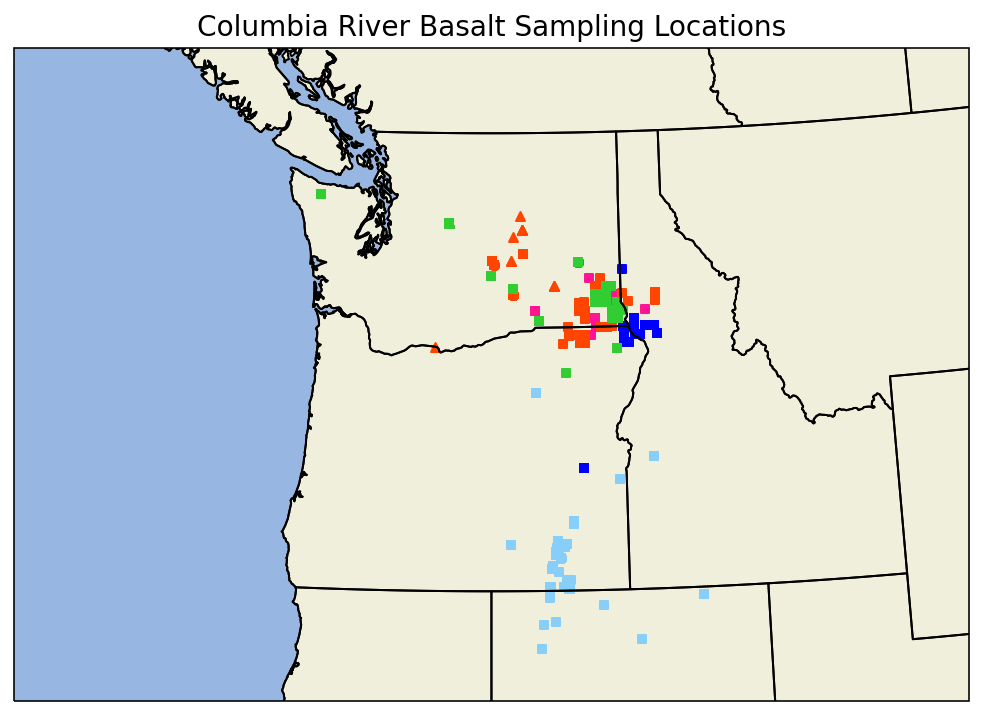

In [29]:
# Define the map extent and figure parameters.
central_lat = 45
central_lon = -120
extent = [-130, -110, 40, 50]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize = [12,6])
ax = plt.axes(projection = ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)
ax.set_title('Columbia River Basalt Sampling Locations', fontsize = 14)
ax.set_xlabel('Longitude', fontsize = 12)
ax.set_ylabel('Latitude', fontsize = 12)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
ax.coastlines()
# ax.gridlines()

# Plot sampling locations.                                                                 
gb_inclusion.get_group(' STEENS BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker='o', c='lightskyblue', transform = ccrs.PlateCarree())
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker='o', c='orangered', transform = ccrs.PlateCarree())

gb_mineral.get_group(' STEENS BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='lightskyblue', transform = ccrs.PlateCarree())
gb_mineral.get_group(' IMNAHA BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='blue', transform = ccrs.PlateCarree())
gb_mineral.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='deeppink', transform = ccrs.PlateCarree())
gb_mineral.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='orangered', transform = ccrs.PlateCarree())
gb_mineral.get_group(' GRANDE RONDE BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='limegreen', transform = ccrs.PlateCarree())

gb_glass.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='^', c='orangered', transform = ccrs.PlateCarree())
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='^', c='limegreen', transform = ccrs.PlateCarree())

gb_wholerock.get_group(' STEENS BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='lightskyblue', transform = ccrs.PlateCarree())
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='blue', transform = ccrs.PlateCarree())
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='deeppink', transform = ccrs.PlateCarree())
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='orangered', transform = ccrs.PlateCarree())
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(ax=ax, x='LONGITUDE (MAX.)', y='LATITUDE (MAX.)', marker ='s', c='limegreen', transform = ccrs.PlateCarree());

<b>Figure 1:</b> Map displaying geographic location of CRBG Sampling sites in the Pacific Northwest United States.
<br/>
<br/>
<br/>


<b>Step 8:</b> Analyze the evolution of geochemistry over the emplacement of the Columbia River Basalt Group. Plot Total Alkali-Silica (TAS) diagram grouped by stratigraphic formation for inclusions, volcanic glass and wholerock data. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

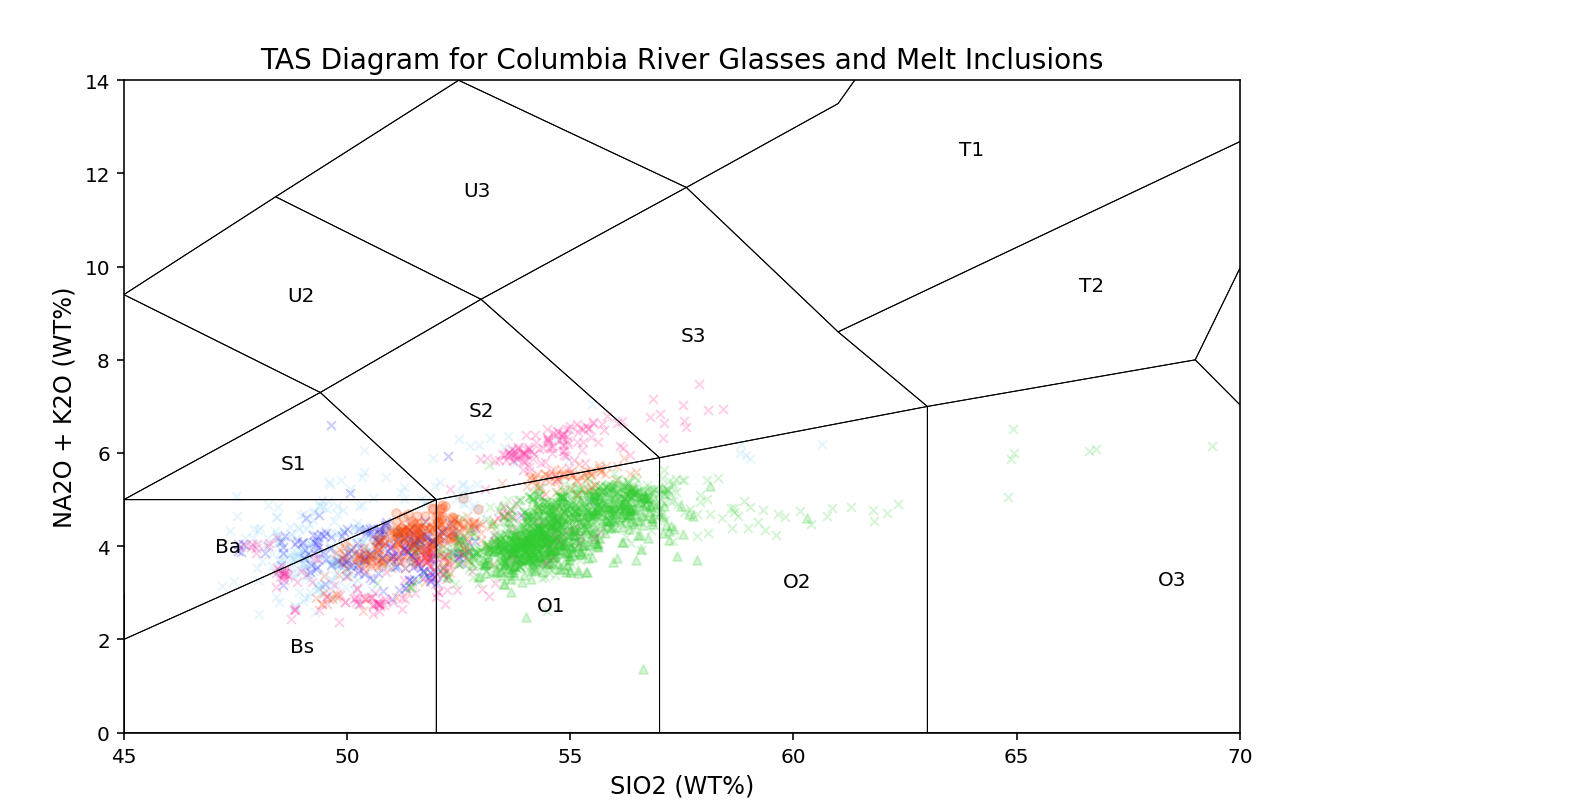

In [28]:
# from pyrolite.util.plot.axes import share_axes
# from pyrolite.plot.templates import TAS

# # Plot Total Alkali content vs. SiO2 for inclusion, glass, and wholerock data.
# ax = TAS(linewidth=0.5, labels='ID', figsize=[10,6])
# gb_inclusion.get_group(' STEENS BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='lightskyblue', marker='o', alpha = 0.2)
# gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='orangered', marker='o', alpha = 0.2)

# gb_glass.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='orangered', marker='^', alpha = 0.2)
# gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='limegreen', marker='^', alpha = 0.2)

# gb_wholerock.get_group(' STEENS BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='lightskyblue', marker='x', alpha = 0.2)
# gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='blue', marker='x', alpha = 0.2)
# gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='deeppink', marker='x', alpha = 0.2)
# gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='orangered', marker='x', alpha = 0.2)
# gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(ax=ax, x='SIO2(WT%)NORM', y='NA2O+K2O(WT%)NORM', c='limegreen', marker='x', alpha = 0.2)

# ax.set_title('TAS Diagram for Columbia River Glasses and Melt Inclusions', fontsize = 14)
# ax.set_xlabel('SIO2 (WT%)', fontsize = 12)
# ax.set_ylabel('NA2O + K2O (WT%)', fontsize = 12)
# ax.set_xlim(45,70)
# ax.set_ylim(0,14)
# # ax.legend(fontsize = 10)

# # plt.legend(loc='lower right')
# plt.show();

<b>Figure 2:</b> Total Alkali Silica Diagram of published CRBG data retrieved from GEOROC database. 
<br/>
<br/>
<br/>


Compare Mg# for different formations

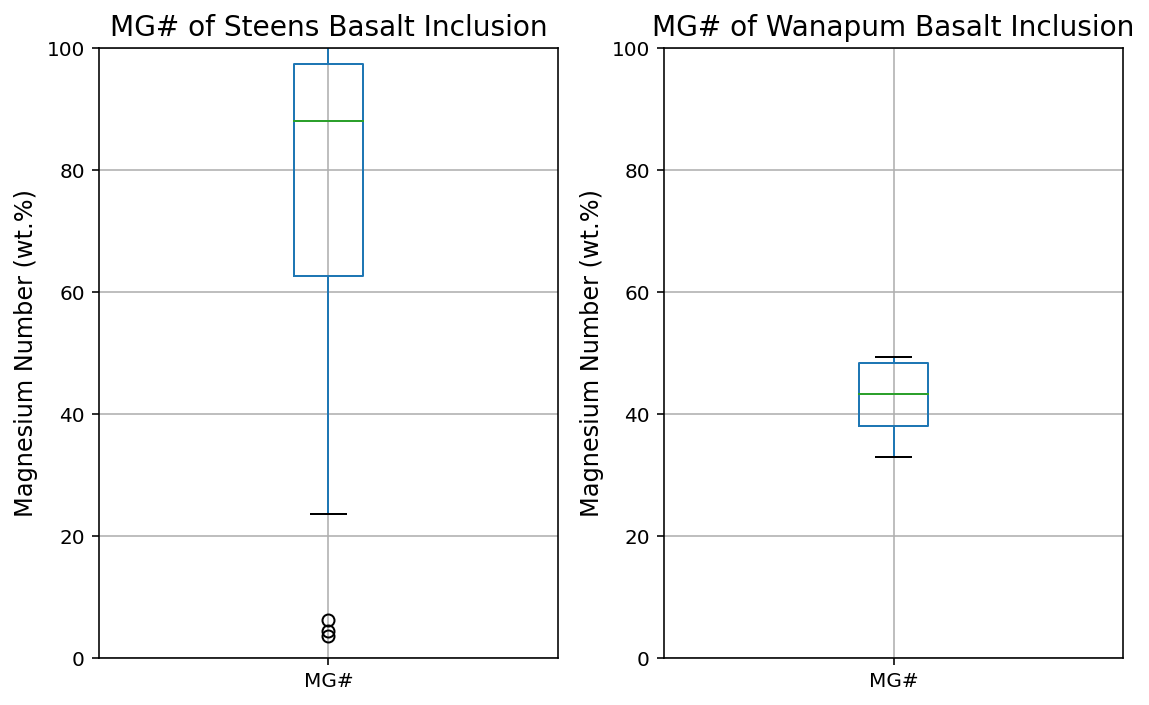

In [127]:
fig, ax= plt.subplots(ncols=2, figsize=(8,5), tight_layout = True)

gb_inclusion.get_group(' STEENS BASALT').boxplot(column=['MG#'], ax=ax[0])
ax[0].set_ylim(0,100)
ax[0].set_ylabel('Magnesium Number (wt.%)', fontsize = 12)
ax[0].set_title('MG# of Steens Basalt Inclusion', fontsize = 14)

gb_inclusion.get_group(' WANAPUM BASALT').boxplot(column=['MG#'], ax=ax[1])
ax[1].set_ylim(0,100)
ax[1].set_ylabel('Magnesium Number (wt.%)', fontsize = 12)
ax[1].set_title('MG# of Wanapum Basalt Inclusion', fontsize = 14);

<b>Figure 3:</b> Magnesium number from inclusion data. The earlier emplaced Steens Basalt disply a more primitive composition than the more recent Wanapum formation.
<br/>
<br/>
<br/>


<b> Step 9: </b>Create a series of Harker Diagrams to analyze CRBG geochemical evolution.

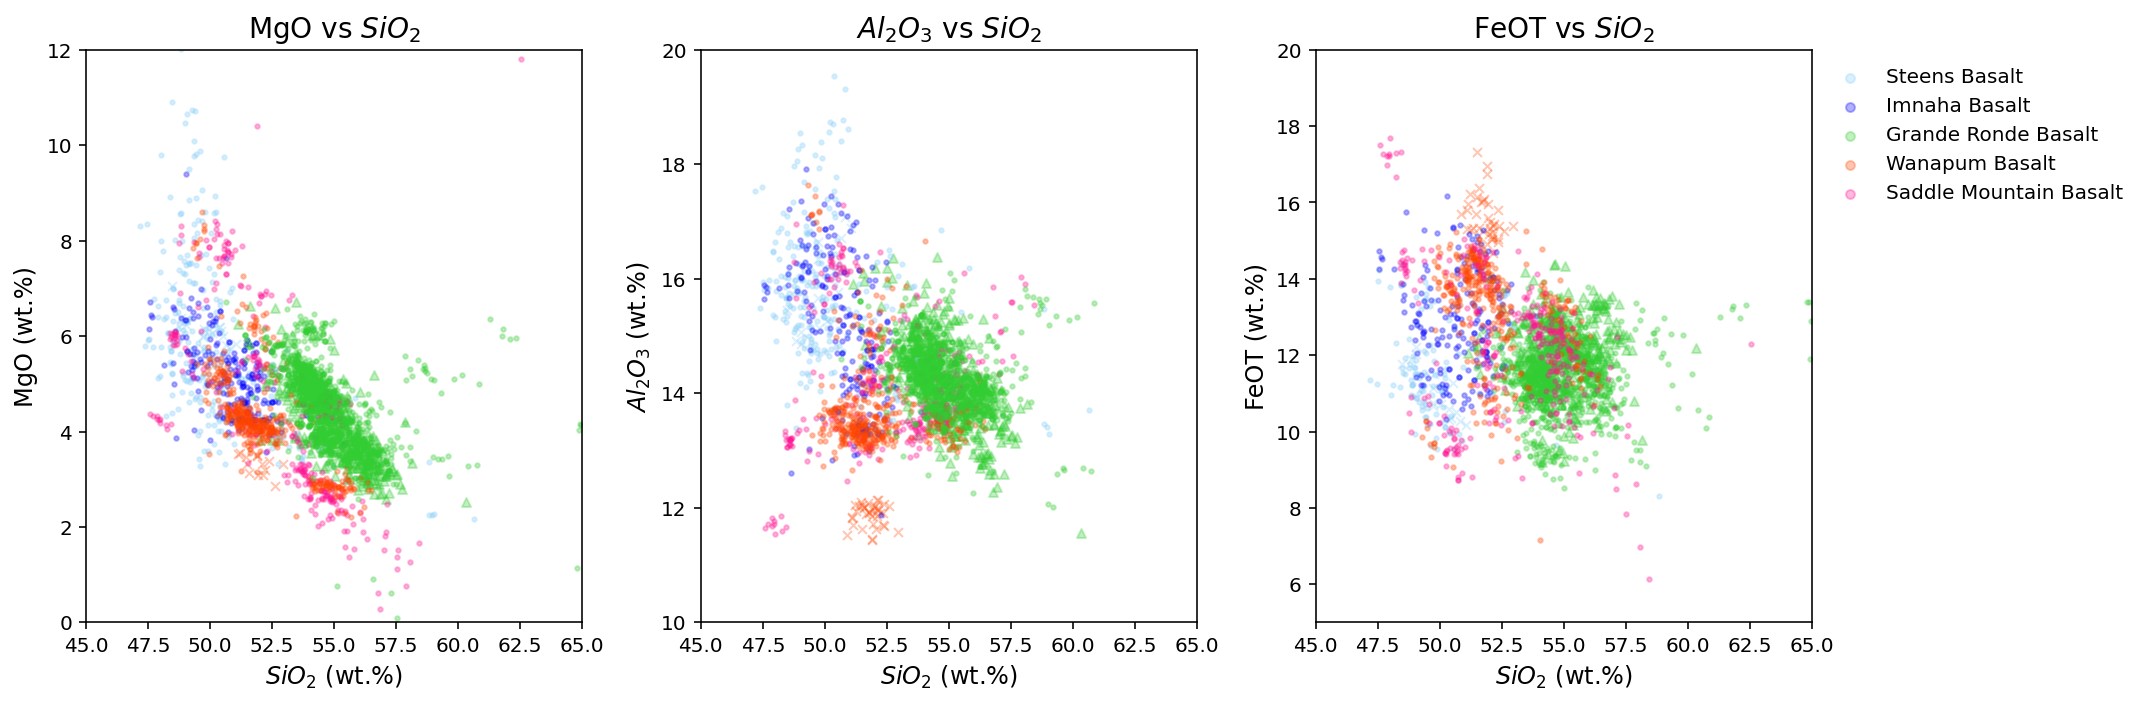

In [126]:
fig, ax= plt.subplots(ncols=3, figsize=(15,5), tight_layout = True)

gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='lightskyblue', marker='x', alpha=0.3, ax=ax[0])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='orangered', marker='x', alpha=0.3, ax=ax[0])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='orangered', marker='^', alpha=0.3, ax=ax[0])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='limegreen', marker='^', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='lightskyblue', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='blue', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='deeppink', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='orangered', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='MGO(WT%)NORM', c='limegreen', marker='.', alpha = 0.3, ax=ax[0])

gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='lightskyblue', marker='x', alpha=0.3, ax=ax[1])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='orangered', marker='x', alpha=0.3, ax=ax[1])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='orangered', marker='^', alpha=0.3, ax=ax[1])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='limegreen', marker='^', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='lightskyblue', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='blue', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='deeppink', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='orangered', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='AL2O3(WT%)NORM', c='limegreen', marker='.', alpha = 0.3, ax=ax[1])

gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='lightskyblue', marker='x', alpha=0.3, ax=ax[2])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='orangered', marker='x', alpha=0.3, ax=ax[2])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='orangered', marker='^', alpha=0.3, ax=ax[2])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='limegreen', marker='^', alpha=0.3, ax=ax[2])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='lightskyblue', marker='.', alpha = 0.3,label='Steens Basalt', ax=ax[2])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='blue', marker='.', alpha = 0.3,label='Imnaha Basalt', ax=ax[2])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='limegreen', marker='.', alpha = 0.3,label='Grande Ronde Basalt', ax=ax[2])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='orangered', marker='.', alpha = 0.3,label='Wanapum Basalt', ax=ax[2])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='FEOT(WT%)NORM', c='deeppink', marker='.', alpha = 0.3,label='Saddle Mountain Basalt', ax=ax[2])

ax[0].set_title('MgO vs $SiO_2$', fontsize = 14)
ax[0].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[0].set_ylabel('MgO (wt.%)', fontsize = 12)
ax[0].set_xlim(45,65)
ax[0].set_ylim(0,12)

ax[1].set_title('$Al_2O_3$ vs $SiO_2$', fontsize = 14)
ax[1].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[1].set_ylabel('$Al_2O_3$ (wt.%)', fontsize = 12)
ax[1].set_xlim(45,65)
ax[1].set_ylim(10,20)

ax[2].set_title('FeOT vs $SiO_2$', fontsize = 14)
ax[2].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[2].set_ylabel('FeOT (wt.%)', fontsize = 12)
ax[2].set_xlim(45,65)
ax[2].set_ylim(5,20)
ax[2].legend(fontsize = 10, markerscale = 2);

<b>Figure 4:</b> Harker Diagram of major element composition for inclusions, glasses, and whole rock for each formation. Symbol shape denotes sample type, wholerock displayed as circles, inclusions displayed as x's, glass displayed as triangles.
<br/>
<br/>
<br/>


<b>Step 9:</b> Analyze the evolution of geochemistry over the emplacement of the Columbia River Basalt Group. Use Zr as an index of magma differentiation. Plot Y, Ce/Y, and Ba/La vs Zr, grouped by stratigraphic formation for volcanic glass and inclusions. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

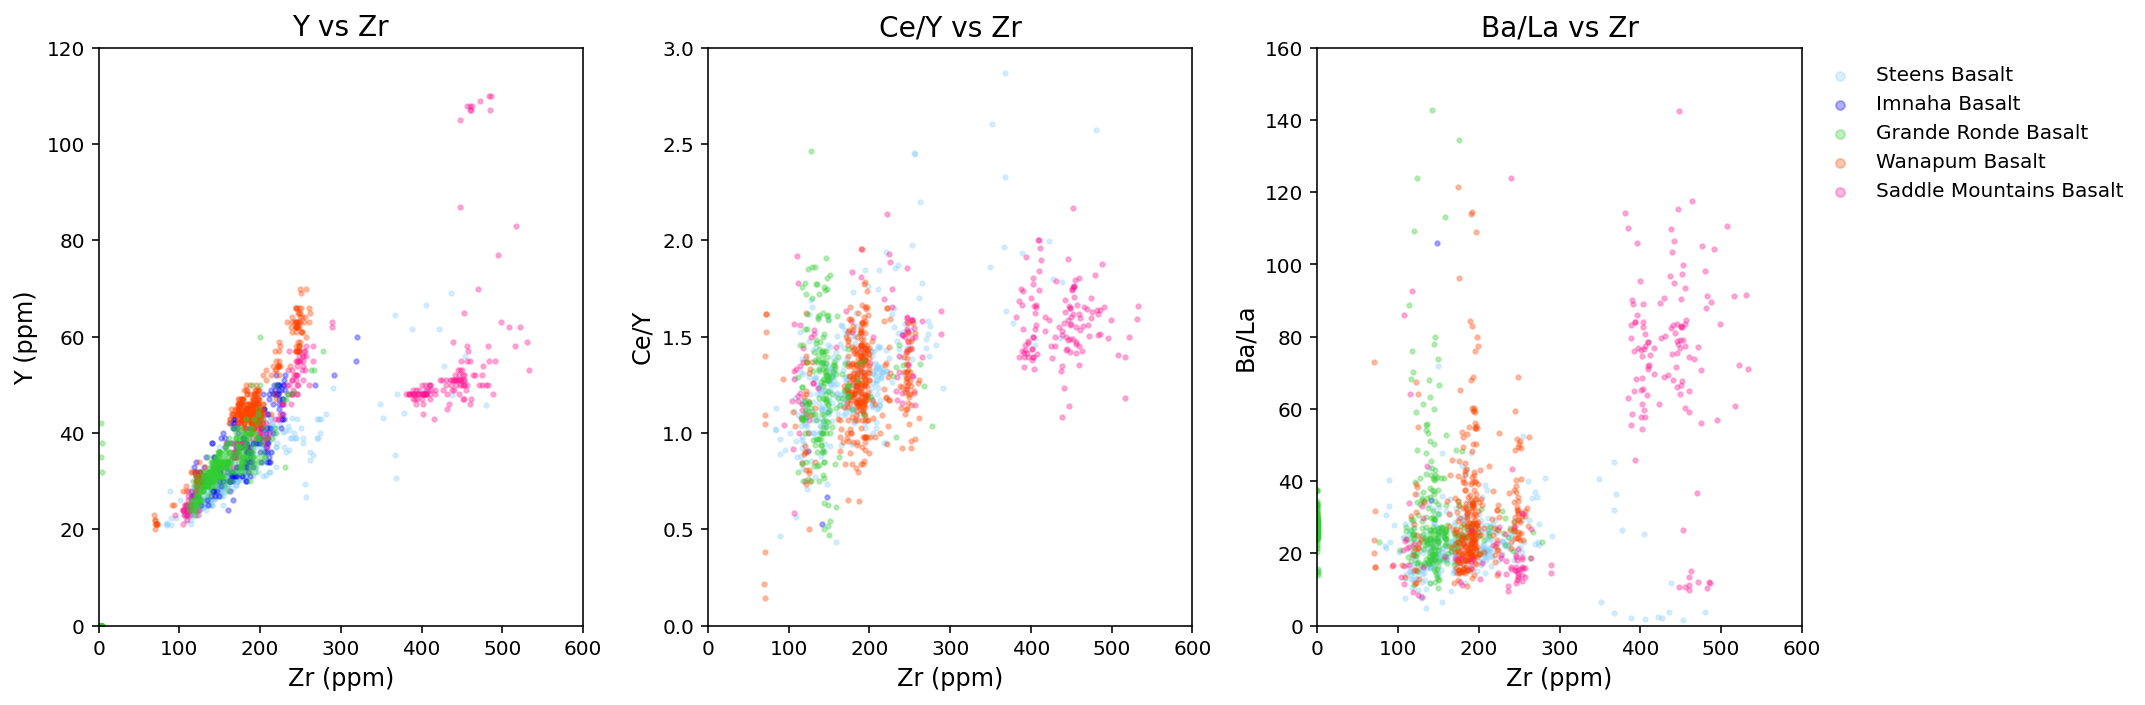

In [124]:
# Plot Zr as an index of magma differentiation. (a) Y vs. Zr, (b) Ce/Y vs. Zr (c) Ba/La vs. Zr.
fig, ax= plt.subplots(ncols=3, figsize=(15,5), tight_layout = True)

gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='lightskyblue', marker='x', alpha=0.3, ax=ax[0])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='orangered', marker='x', alpha=0.3, ax=ax[0])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='orangered', marker='^', alpha=0.3, ax=ax[0])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='limegreen', marker='^', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='lightskyblue', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='blue', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='deeppink', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='orangered', marker='.', alpha = 0.3, ax=ax[0])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='Y(PPM)', c='limegreen', marker='.', alpha = 0.3, ax=ax[0])

ax[0].set_title('Y vs Zr', fontsize = 14)
ax[0].set_xlabel('Zr (ppm)', fontsize = 12)
ax[0].set_ylabel('Y (ppm)', fontsize = 12)
ax[0].set_xlim(0,600)
ax[0].set_ylim(0,120)

gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='lightskyblue', marker='x', alpha=0.3, ax=ax[1])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='orangered', marker='x', alpha=0.3, ax=ax[1])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='orangered', marker='^', alpha=0.3, ax=ax[1])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='limegreen', marker='^', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='lightskyblue', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='blue', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='deeppink', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='orangered', marker='.', alpha = 0.3, ax=ax[1])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='CE/Y', c='limegreen', marker='.', alpha = 0.3, ax=ax[1])

ax[1].set_title('Ce/Y vs Zr', fontsize = 14)
ax[1].set_xlabel('Zr (ppm)', fontsize = 12)
ax[1].set_ylabel('Ce/Y', fontsize = 12)
ax[1].set_xlim(0,600)
ax[1].set_ylim(0,3)

gb_inclusion.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='lightskyblue', marker='x', alpha=0.3, ax=ax[2])
gb_inclusion.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='orangered', marker='x', alpha=0.3, ax=ax[2])
gb_glass.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='orangered', marker='^', alpha=0.3, ax=ax[2])
gb_glass.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='limegreen', marker='^', alpha=0.3, ax=ax[2])
gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='lightskyblue', marker='.', alpha = 0.3,label = 'Steens Basalt', ax=ax[2])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='blue', marker='.', alpha = 0.3,label = 'Imnaha Basalt', ax=ax[2])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='limegreen', marker='.', alpha = 0.3, label = 'Grande Ronde Basalt', ax=ax[2])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='orangered', marker='.', alpha = 0.3,label = 'Wanapum Basalt', ax=ax[2])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='ZR(PPM)', y='BA/LA', c='deeppink', marker='.', alpha = 0.3,label = 'Saddle Mountains Basalt', ax=ax[2])

ax[2].set_title('Ba/La vs Zr', fontsize = 14)
ax[2].set_xlabel('Zr (ppm)', fontsize = 12)
ax[2].set_ylabel('Ba/La', fontsize = 12)
ax[2].set_xlim(0,600)
ax[2].set_ylim(0,160)
ax[2].legend(fontsize = 10, markerscale = 2);


<b>Figure 5:</b> Zr as an index of magma differentiation. (a) Y vs. Zr, (b) Ce/Y vs. Zr, (c) Ba/La vs Zr. Symbol shape denotes sample type, wholerock displayed as circles, inclusions displayed as x's, glass displayed as triangles.
<br/>
<br/>
<br/>


<b>Step 10:</b> Analyze the inferred volatile content over the emplacement of the Columbia River Basalt Group. Create a multi-panel plot using whole rock trace element data as proxies: Ce for H2O and Nb for CO2. Symbol color denotes stratigraphic unit.

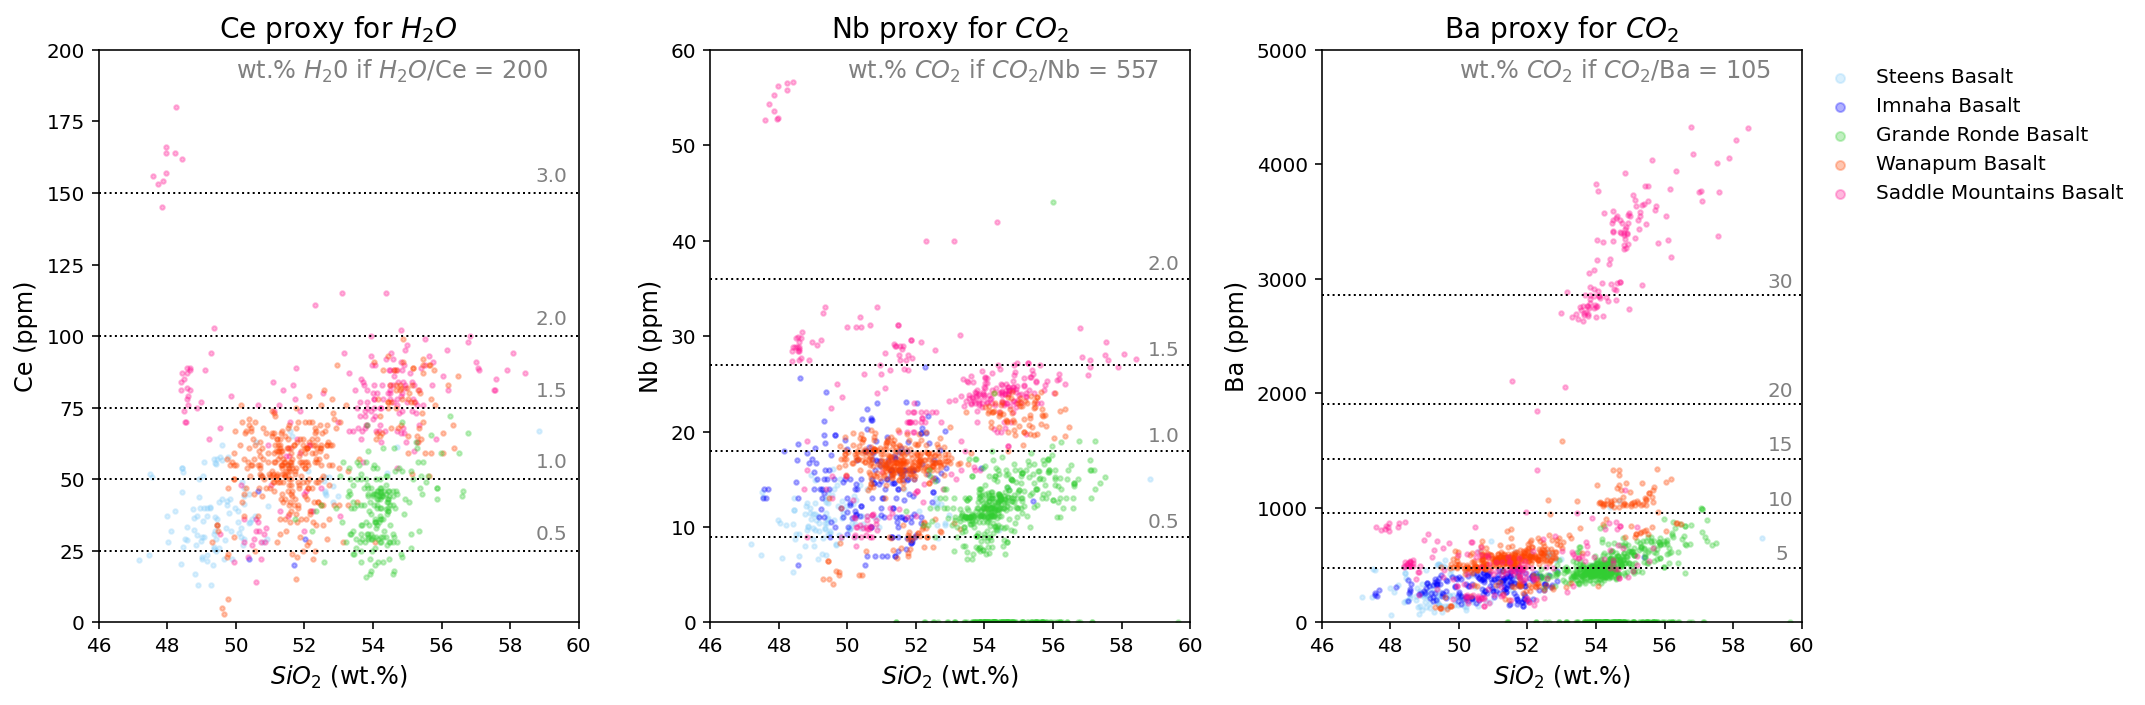

In [123]:
fig, ax= plt.subplots(ncols=3, figsize=(15,5), tight_layout = True)

gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', c='lightskyblue', vmin=0, marker ='.', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', c='blue', vmin=0, marker ='.', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', c='deeppink',vmin=0, marker ='.', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', c='orangered', vmin=0, marker ='.', alpha=0.3, ax=ax[0])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='CE(PPM)', c='limegreen', vmin=0, marker ='.', alpha=0.3, ax=ax[0])

gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', c='lightskyblue', vmin=0, marker ='.', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', c='blue', vmin=0, marker ='.', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', c='deeppink',vmin=0, marker ='.', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', c='orangered', vmin=0, marker ='.', alpha=0.3, ax=ax[1])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='NB(PPM)', c='limegreen', vmin=0, marker ='.', alpha=0.3, ax=ax[1])

gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='BA(PPM)', c='lightskyblue', vmin=0, marker ='.', alpha=0.3, label = 'Steens Basalt', ax=ax[2])
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='SIO2(WT%)NORM', y='BA(PPM)', c='blue', vmin=0, marker ='.', alpha=0.3,label = 'Imnaha Basalt', ax=ax[2])
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='SIO2(WT%)NORM', y='BA(PPM)', c='limegreen', vmin=0, marker ='.', alpha=0.3,label = 'Grande Ronde Basalt', ax=ax[2])
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='SIO2(WT%)NORM', y='BA(PPM)', c='orangered', vmin=0, marker ='.', alpha=0.3, label = 'Wanapum Basalt', ax=ax[2])
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='SIO2(WT%)NORM', y='BA(PPM)', c='deeppink',vmin=0, marker ='.', alpha=0.3, label = 'Saddle Mountains Basalt', ax=ax[2])

ax[0].set_title('Ce proxy for $H_2O$', fontsize = 14)
ax[0].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[0].set_ylabel('Ce (ppm)', fontsize = 12)
ax[0].set_xlim(46,60)
ax[0].set_ylim(0,200)
ax[0].axhline(y=25, linestyle='dotted', color ='k', label='0.5')
ax[0].axhline(y=50, linestyle='dotted', color ='k', label='1.0')
ax[0].axhline(y=75, linestyle='dotted', color ='k', label='1.5')
ax[0].axhline(y=100, linestyle='dotted', color ='k', label='2.0')
ax[0].axhline(y=150, linestyle='dotted', color ='k', label='3.0')
ax[0].text(50, 190, r'wt.% $H_20$ if $H_2O$/Ce = 200', fontsize=12, color='gray')
ax[0].text(58.75, 29, r'0.5', fontsize=10, color='gray')
ax[0].text(58.75, 54, r'1.0', fontsize=10, color='gray')
ax[0].text(58.75, 79, r'1.5', fontsize=10, color='gray')
ax[0].text(58.75, 104, r'2.0', fontsize=10, color='gray')
ax[0].text(58.75, 154, r'3.0', fontsize=10, color='gray')

ax[1].set_title('Nb proxy for $CO_2$', fontsize = 14)
ax[1].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[1].set_ylabel('Nb (ppm)', fontsize = 12)
ax[1].set_xlim(46,60)
ax[1].set_ylim(0,60)
ax[1].axhline(y=9, linestyle='dotted', color ='k', label='0.5')
ax[1].axhline(y=18, linestyle='dotted', color ='k', label='1.0')
ax[1].axhline(y=27, linestyle='dotted', color ='k', label='1.5')
ax[1].axhline(y=36, linestyle='dotted', color ='k', label='2.0')
ax[1].text(50, 57, r'wt.% $CO_2$ if $CO_2$/Nb = 557', fontsize=12, color='gray')
ax[1].text(58.75, 10, r'0.5', fontsize=10, color='gray')
ax[1].text(58.75, 19, r'1.0', fontsize=10, color='gray')
ax[1].text(58.75, 28, r'1.5', fontsize=10, color='gray')
ax[1].text(58.75, 37, r'2.0', fontsize=10, color='gray')


ax[2].set_title('Ba proxy for $CO_2$', fontsize = 14)
ax[2].set_xlabel('$SiO_2$ (wt.%)', fontsize = 12)
ax[2].set_ylabel('Ba (ppm)', fontsize = 12)
ax[2].set_xlim(46,60)
ax[2].set_ylim(0,5000)
ax[2].axhline(y=476, linestyle='dotted', color ='k')
ax[2].axhline(y=952, linestyle='dotted', color ='k')
ax[2].axhline(y=1428, linestyle='dotted', color ='k')
ax[2].axhline(y=1904, linestyle='dotted', color ='k')
ax[2].axhline(y=2856, linestyle='dotted', color ='k')
ax[2].text(50, 4750, r'wt.% $CO_2$ if $CO_2$/Ba = 105', fontsize=12, color='gray')
ax[2].text(59.25, 548, r'5', fontsize=10, color='gray')
ax[2].text(59, 1024, r'10', fontsize=10, color='gray')
ax[2].text(59, 1498, r'15', fontsize=10, color='gray')
ax[2].text(59, 1976, r'20', fontsize=10, color='gray')
ax[2].text(59, 2928, r'30', fontsize=10, color='gray')
ax[2].legend(fontsize = 10, markerscale = 2)

plt.show();

<b>Figure 6:</b> Trace element proxies to estimate initial volatile contents of the CRBG magmas. Ce, Nb, and Ba vs. SiO2 to estimate H2O and CO2 concentrations, respectively. Plotted data is wholerock data. In each plot, dashed lines indicate predicted concentrations (wt.%) of specified volatiles, assuming mantle volatile/lithophile elemental ratios of 200 for H2O/Ce (Michael, 1995; Saal et al., 2002), 557 for CO2/Nb (Le Voyer et al., 2017), and 105 for CO2/Ba (Michael and Graham, 2015). 
<br/>
<br/>
<br/>

<b>Step 11:</b> Analyze the evolution of geochemistry over the emplacement of the Columbia River Basalt Group. Calculate and plot Europium (Eu*) anomaly grouped by stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

In [ ]:
# Is there a Eu anomaly that indicates plagioclase fractionation?
# Europium anomaly vs la/y which gives slope of REE profile. Compare with MORB dataset: Jenner and O’Neil (2012): 
# 600 MORB glasses under same conditions

<b>Step 12:</b> Analyze the evolution of geochemistry over the emplacement of the Columbia River Basalt Group. Calculate and plot Dysprosium (Dy) anomaly grouped by stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit. Symbol shape denotes sample type. Symbol color denotes stratigraphic unit.

In [ ]:
# plot ['DY/DY*']vs['DY/YB'] ....needs to be chondrite normalized
# Compare to Davidson et al 2013 JPet Fig 5
fig, ax= plt.subplots(ncols=1, figsize=(8,5))

gb_wholerock.get_group(' STEENS BASALT').plot.scatter(x='DY/YB', y='DY/DY*', c='lightskyblue', marker='x', alpha = 0.3, ax=ax)
gb_wholerock.get_group(' IMNAHA BASALT').plot.scatter(x='DY/YB', y='DY/DY*', c='blue', marker='x', alpha = 0.3, ax=ax)
gb_wholerock.get_group(' SADDLE MOUNTAINS BASALT').plot.scatter(x='DY/YB', y='DY/DY*', c='deeppink', marker='x', alpha = 0.3, ax=ax)
gb_wholerock.get_group(' WANAPUM BASALT').plot.scatter(x='DY/YB', y='DY/DY*', c='orangered', marker='x', alpha = 0.3, ax=ax)
gb_wholerock.get_group(' GRANDE RONDE BASALT').plot.scatter(x='DY/YB', y='DY/DY*', c='limegreen', marker='x', alpha = 0.3, ax=ax);

# Is there a Dy anomaly that indicates lithosphere vs asthenosphere melting?
# Dysprosium anomalies -> can tell us about xtylization and melting, if garnet in the source should be dysprosium anomaly - 
#Q: lithosphere vs asthenosphere melting? Garnet only stable really deep. If strong garnet signal imply a deep source (such as ~80km deep). 
#If no signature then the asthenosphere. Refer to Davidson et al 2013 JPet Figure 5.